<a href="https://colab.research.google.com/github/tranhuuan1703/dataScience-2024/blob/main/Email_spam_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libaries.

<p>Import the libaries necessary to handle training and evaluation model.</p>

In [1]:
# the libaries to working data
import pandas as pd
import numpy as np

# Visualization data
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# preprocessing data
import re
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.layers import TextVectorization

# buildinng model
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GlobalAveragePooling1D

nltk.download('stopwords')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# OVerview data

In [2]:
!unzip '/content/drive/MyDrive/AI professional/tensorflow/smsspamcollection.zip' -d my_data

Archive:  /content/drive/MyDrive/AI professional/tensorflow/smsspamcollection.zip
  inflating: my_data/SMSSpamCollection  
  inflating: my_data/readme          


In [3]:
path = '/content/my_data/SMSSpamCollection'

df = pd.read_csv(path, sep='\t', names=['label', 'text'])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


# Text Presentiation

In [6]:
def sentence_clean(sentence):

  sentence = sentence.lower()
  sentence = re.sub(r'[^a-zA-Z0-9]', ' ', sentence)
  sentence = re.sub(r'\s+', ' ', sentence)

  clean_text = []
  for word in sentence.split(" "):
    if word not in stopword:
      clean_text.append(word)

  return ' '.join(clean_text)

vectorize_layer = TextVectorization(
    max_tokens=20000,
    output_sequence_length=1000
)


In [7]:
# define layer for embedding
embedding_layer = Embedding(
    input_dim=10000,
    output_dim=16,

)

In [8]:
# # test case
# text = df['text'][11]
# text_vector = vectorize_layer(text)
# print(text_vector.shape)

# embedding_vector = embedding_layer(text_vector)
# print(embedding_vector.shape)

# train test split data

In [9]:
import tensorflow as tf

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [11]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).cache().prefetch(tf.data.AUTOTUNE).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).cache().prefetch(tf.data.AUTOTUNE).batch(32)

In [12]:
# dataset = tf.data.Dataset.from_tensor_slices((df['text'], df['label'])).cache().prefetch(tf.data.AUTOTUNE).batch(32)

In [13]:
vocab_size = 20000
embedding_dim = 16
model = Sequential([
  vectorize_layer,
  Embedding(vocab_size, embedding_dim, name="embedding"),
  GlobalAveragePooling1D(),
  Dense(16, activation='relu'),
  Dense(1)
])

In [14]:
text_ds = df['text'].map(sentence_clean)
vectorize_layer.adapt(text_ds)

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_model = model.fit(train_ds, epochs=100, validation_data=test_ds)

Epoch 1/100
140/140 [==============================] - 7s 24ms/step - loss: 0.4072 - accuracy: 0.8658 - val_loss: 0.3929 - val_accuracy: 0.8664
Epoch 2/100
140/140 [==============================] - 3s 19ms/step - loss: 0.3934 - accuracy: 0.8658 - val_loss: 0.3913 - val_accuracy: 0.8664
Epoch 3/100
140/140 [==============================] - 2s 14ms/step - loss: 0.3917 - accuracy: 0.8658 - val_loss: 0.3895 - val_accuracy: 0.8664
Epoch 4/100
140/140 [==============================] - 2s 13ms/step - loss: 0.3895 - accuracy: 0.8658 - val_loss: 0.3870 - val_accuracy: 0.8664
Epoch 5/100
140/140 [==============================] - 2s 15ms/step - loss: 0.3863 - accuracy: 0.8658 - val_loss: 0.3834 - val_accuracy: 0.8664
Epoch 6/100
140/140 [==============================] - 3s 22ms/step - loss: 0.3809 - accuracy: 0.8658 - val_loss: 0.3766 - val_accuracy: 0.8664
Epoch 7/100
140/140 [==============================] - 2s 17ms/step - loss: 0.3678 - accuracy: 0.8658 - val_loss: 0.3622 - val_accuracy:

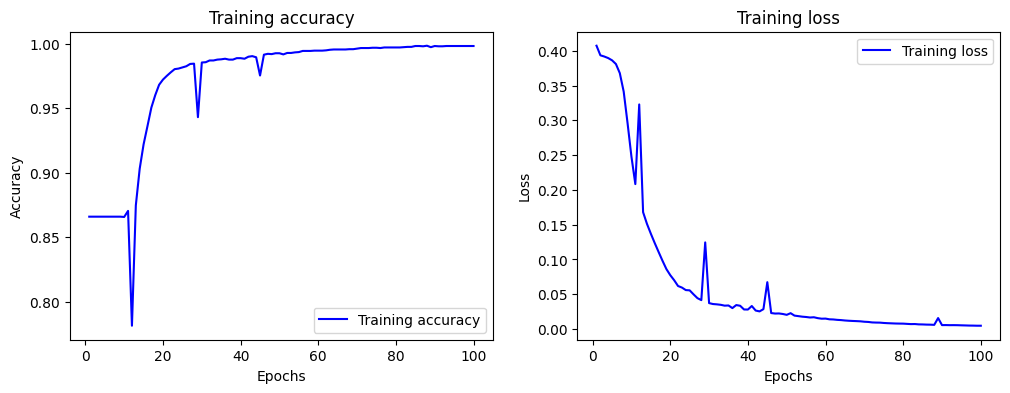

In [16]:
# Plot the training loss and accuracy
def plot_history(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    epochs = range(1, len(acc) + 1)

    # Plotting the accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.title('Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting the loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the plot function
plot_history(history_model)


35/35 [==============================] - 0s 2ms/step


<Axes: >

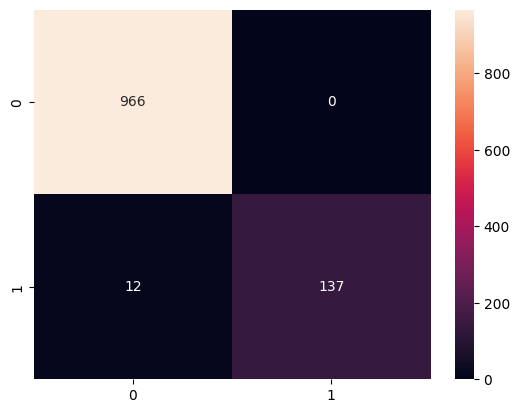

In [17]:
# confusion matrix
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')